In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import random
import cv2

import torch
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

from RNN1 import *


/tmp/ipykernel_25612/2713739428.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


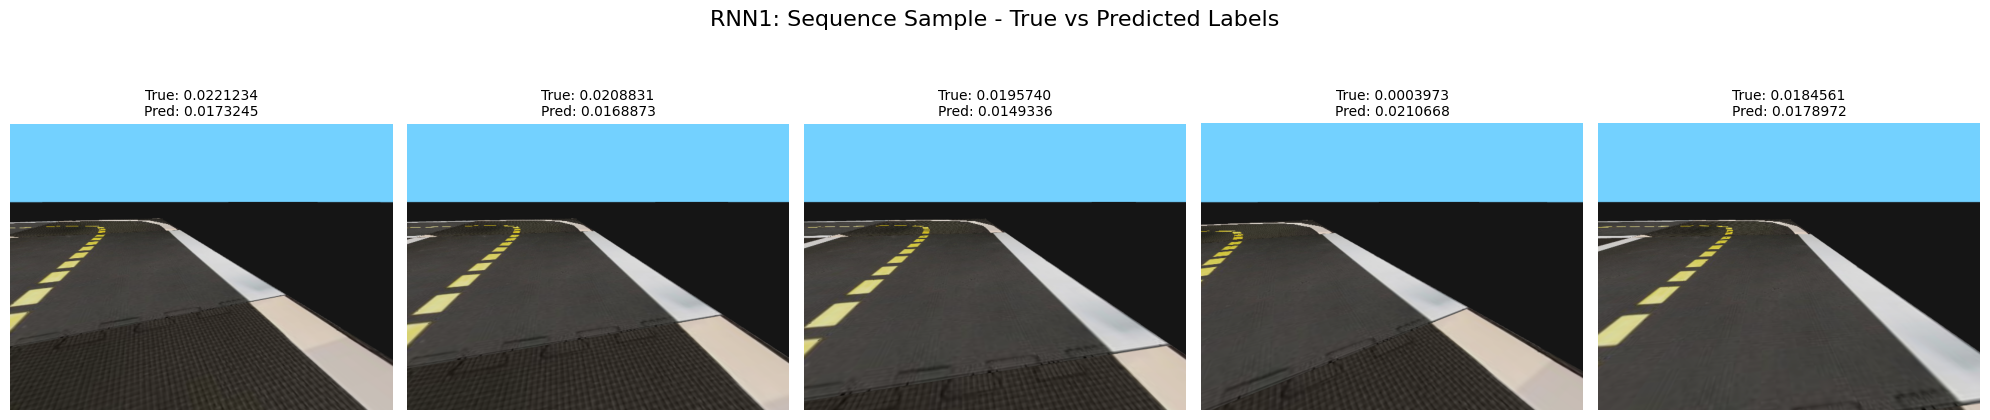

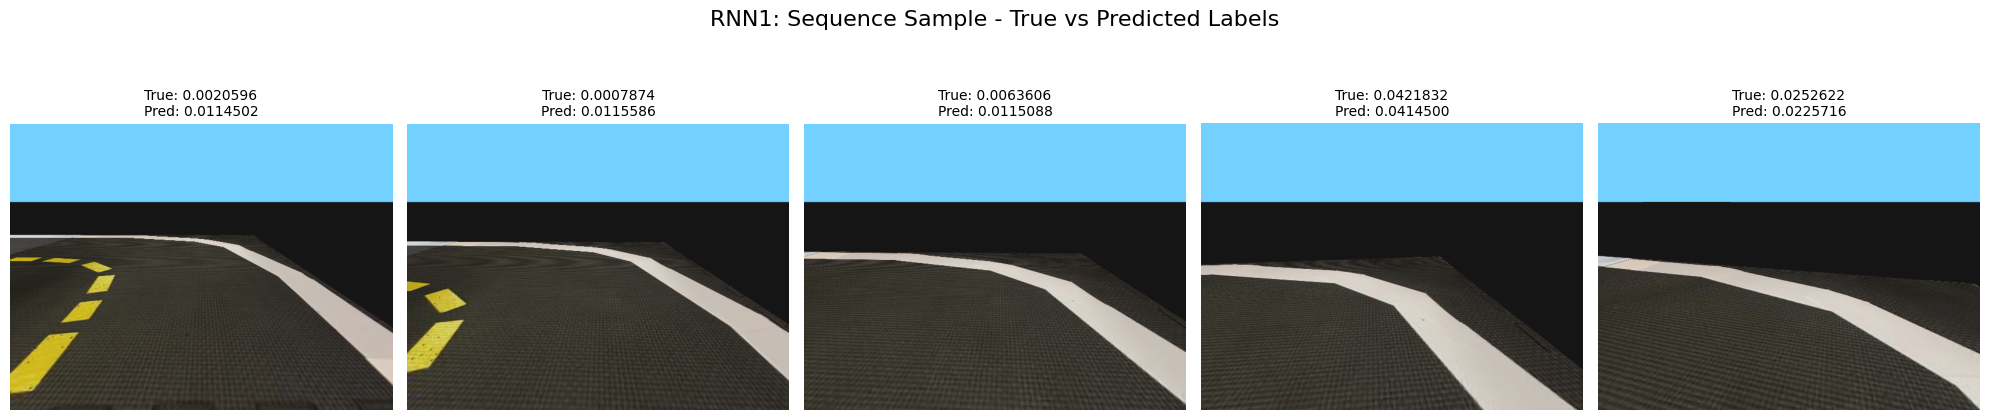

In [6]:

def visualize_predictions(model_path, test_loader, device):

    input_shape = (3, 480, 640)  
    model = LaneDetectionRNN(input_shape=input_shape, rnn_hidden_size=128)
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()

    test_iter = iter(test_loader)
    images, true_labels = next(test_iter)  
    images, true_labels = images.to(device), true_labels.to(device)

    with torch.no_grad():
        predictions, _ = model(images)
        predictions = predictions.squeeze(-1) 


    batch_size, seq_length, _, _, _ = images.shape
    for i in range(batch_size):
        fig, axes = plt.subplots(1, seq_length, figsize=(20, 5))
        fig.suptitle(f"RNN1: Sequence Sample - True vs Predicted Labels", fontsize=16)
        for t in range(seq_length):
            # Convert the image tensor to PIL image
            img = to_pil_image(images[i, t].cpu())
            
            axes[t].imshow(img)
            axes[t].axis("off")
            axes[t].set_title(f"True: {true_labels[i, t]:.7f}\nPred: {predictions[i, t]:.7f}", fontsize=10)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":

    model_path = "models/lane_detection_rnn_new_RNN1.pth"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    image_folder = "../datasets/trail2/images"
    lablel_folder = "../datasets/trail2/labels"
    batch_size = 2  
    seq_length = 5 

    _, _, test_loader = get_sequential_dataloader(
        image_folder, lablel_folder, batch_size=batch_size, seq_length=seq_length, 
        train_fraction=0.85, val_fraction=0.1, test_fraction=0.05)

    visualize_predictions(model_path, test_loader, device)